In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from src.utils.conn_data import load_pickle

plt.style.use("bmh")

In [2]:
sysnames = ["fxdcommts", "fxmmts", "fxmmx", "ratesmmts"]

portfolio = []
for sysname in sysnames:
    output_path = os.path.join(os.getcwd(), "data", "outputs", sysname, "{}.pickle".format(sysname))
    target_dict = load_pickle(path=output_path)
    tmp_portfolio_df = target_dict["portfolio"]

    portfolio.append(tmp_portfolio_df[["daily pnl"]].rename(columns={"daily pnl": "{} daily pnl".format(sysname)}))
portfolio_df = pd.concat(portfolio, axis=1)

portfolio_df.head()

,fxdcommts daily pnl,fxmmts daily pnl,fxmmx daily pnl,ratesmmts daily pnl
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,0.0,NaN,NaN,0.0
2000-01-05,0.0,0.0,NaN,0.0
2000-01-06,0.0,0.0,NaN,0.0
2000-01-07,0.0,0.0,NaN,0.0


<AxesSubplot:>

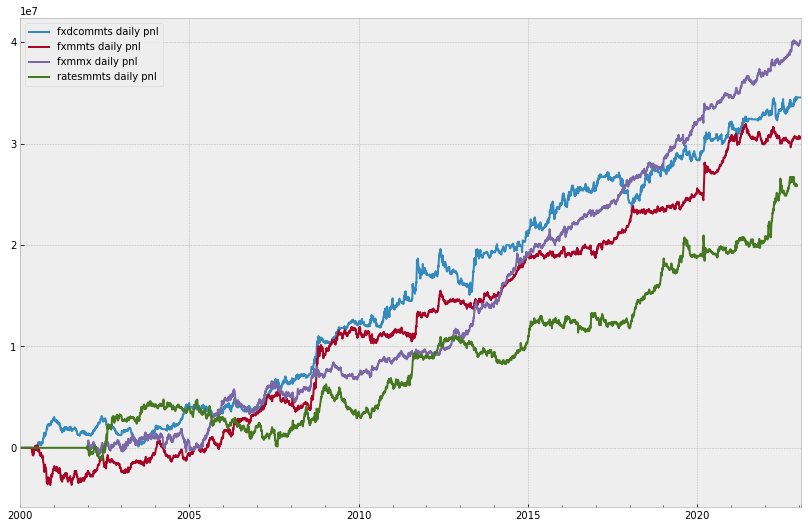

In [3]:
portfolio_df.cumsum().plot(figsize=(14, 9))

In [4]:
portfolio_df.dropna().corr()

,fxdcommts daily pnl,fxmmts daily pnl,fxmmx daily pnl,ratesmmts daily pnl
fxdcommts daily pnl,1.000000,0.318488,0.037425,0.062840
fxmmts daily pnl,0.318488,1.000000,0.341985,0.042858
fxmmx daily pnl,0.037425,0.341985,1.000000,0.016297
ratesmmts daily pnl,0.062840,0.042858,0.016297,1.000000


### 1. Equal weight

<AxesSubplot:>

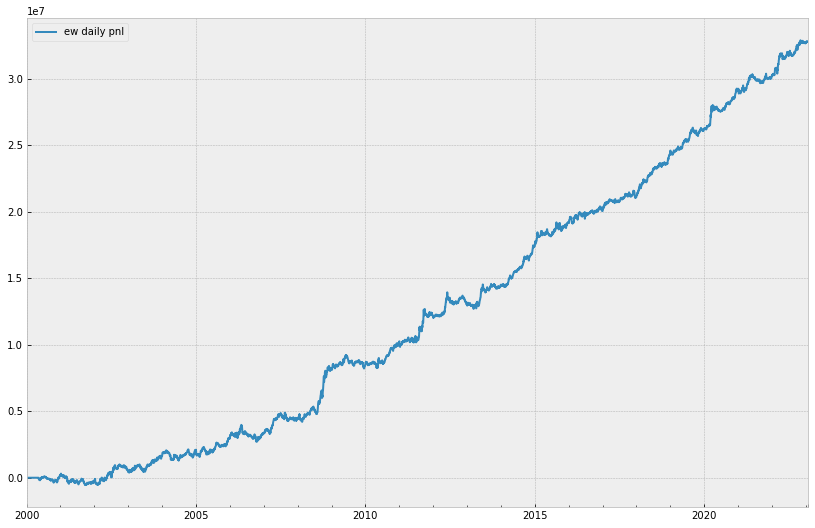

In [5]:
ew_df = pd.DataFrame(portfolio_df.fillna(0).mean(axis=1), columns=["ew daily pnl"])

ew_df.cumsum().plot(figsize=(14, 9))

<AxesSubplot:>

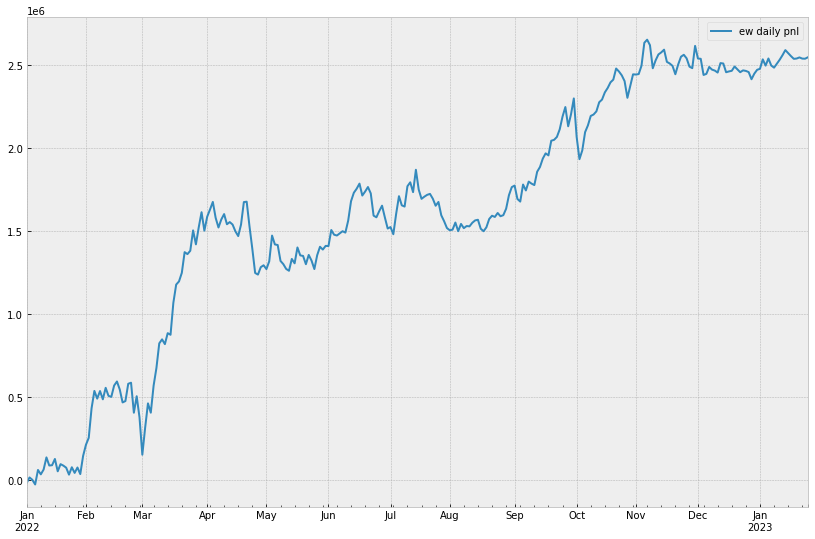

In [6]:
ew_df.loc["2022-01-01":].cumsum().plot(figsize=(14, 9))

<AxesSubplot:>

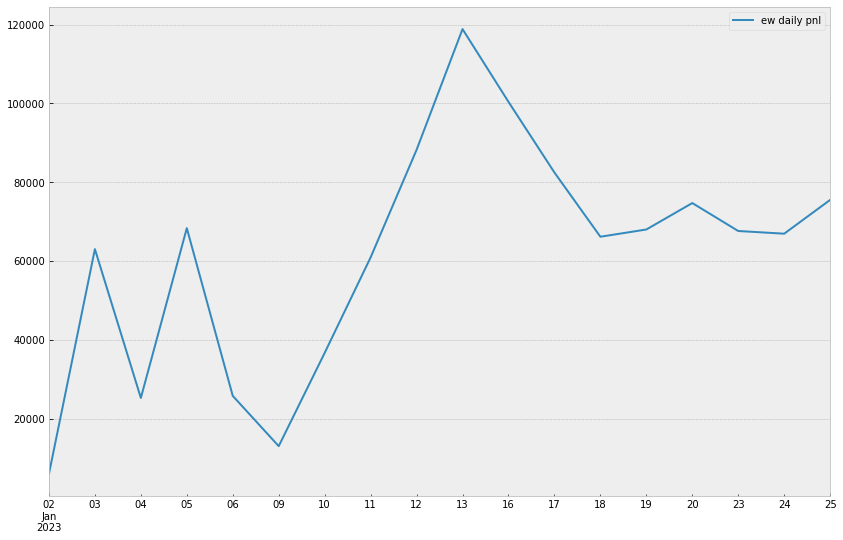

In [7]:
ew_df.loc["2023-01-01":].cumsum().plot(figsize=(14, 9))